lets start our project in a structured way 

1-hypothesis generation :     
* increasing of an interest rate increases the prepayment risk .
* we should keep track of customer information and his history 
* increasing the time to mature increases the prepayment risk so we should keep track of mature date
* penalty of prepayment decreases the risk 
* we need to keep track of informations about service company 

2- load the data and import needed liberaries :

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import networkx as nx
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import matplotlib
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")
%matplotlib inline 

In [7]:
data = pd.read_csv('LoanExport.csv')
data.head(20)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
5,0,199902,N,202901,X,25,1,O,89,40,...,80400,F199Q1224802,N,360,2,Ot,Other servicers,0,0,42
6,0,199902,N,202901,X,25,1,O,90,21,...,53100,F199Q1291436,P,360,1,RE,Other servicers,0,0,44
7,0,199902,X,202901,36740,0,1,O,72,20,...,32800,F199Q1001824,N,360,1,NO,WELLSFARGOBANKNA,1,3,145
8,0,199902,Y,202710,25540,30,1,O,95,38,...,6400,F199Q1079744,P,345,1,Ot,Other servicers,0,0,64
9,0,199902,Y,202901,48620,30,1,O,95,27,...,67000,F199Q1196318,P,360,1,Ot,WELLSFARGOBANKNA,1,104,212


function used :

In [8]:
def draw_histogram(col,plottitle,xlabel,ylabel):
  plt.figure(figsize=(30,10))
  plt.hist(data[col],edgecolor='black')
  plt.title(plottitle)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()
# function to draw histogram to know the density of any categorical data

In [9]:
def draw_boxplot(col):
  sns.boxplot(data[col]) 


In [10]:
def draw_piechart(col,label):
  plt.figure(figsize=(10,10))
  plt.pie(data[col].value_counts(),shadow=True ,autopct='%.3f',labels=label)
  plt.show()

In [11]:
def draw_scatterplot(col1,col2):
  plt.scatter(data[col1],data[col2])


In [12]:
def calc_linearsummary(feature, target):
  y = data[target]
  x = data[feature]
  x = sm.add_constant(x)
  model = sm.OLS(y, x).fit()
  print(model.summary())

In [13]:
def draw_join_plot(colx,coly):
  sns.jointplot(x=colx,y=coly,kind='reg')

In [14]:
def handle_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower=Q1-(1.5*IQR)
  upper=Q3+(1.5*IQR)
  return lower , upper

In [15]:
def label_encoding(col):
  label_encoder = preprocessing.LabelEncoder()
  data[col]= label_encoder.fit_transform(data[col])


In [16]:
def one_hot_encoding(cols):
  one_hot_encoded_data = pd.get_dummies(data, columns = cols)
  return one_hot_encoded_data

3-preprocessing and EDA :

In [17]:
data.shape

(291451, 28)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [19]:
data.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [20]:
data.dtypes

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

In [21]:
data['MaturityDate'] = data['MaturityDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

In [22]:
data['FirstPaymentDate'] = data['FirstPaymentDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CreditScore         291451 non-null  int64         
 1   FirstPaymentDate    291451 non-null  datetime64[ns]
 2   FirstTimeHomebuyer  291451 non-null  object        
 3   MaturityDate        291451 non-null  datetime64[ns]
 4   MSA                 291451 non-null  object        
 5   MIP                 291451 non-null  int64         
 6   Units               291451 non-null  int64         
 7   Occupancy           291451 non-null  object        
 8   OCLTV               291451 non-null  int64         
 9   DTI                 291451 non-null  int64         
 10  OrigUPB             291451 non-null  int64         
 11  LTV                 291451 non-null  int64         
 12  OrigInterestRate    291451 non-null  float64       
 13  Channel             291451 no

In [24]:
num1_cols = data.describe(include='all')
num1_cols

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451,291451,291451,291451,291451.000000,291451.000000,291451,291451.000000,291451.000000,...,291451,291451,291451,291451.000000,291451,266457,291451,291451.000000,291451.000000,291451.000000
unique,NaN,66,3,96,392,NaN,NaN,3,NaN,NaN,...,1767,291451,3,NaN,3,20,20,NaN,NaN,NaN
top,NaN,1999-05-01 00:00:00,N,2029-04-01 00:00:00,X,NaN,NaN,O,NaN,NaN,...,94500,F199Q1268030,P,NaN,2,Ot,Other servicers,NaN,NaN,NaN
freq,NaN,104071,184154,104210,39100,NaN,NaN,276131,NaN,NaN,...,2582,1,123404,NaN,187335,76943,64043,NaN,NaN,NaN
first,NaN,1999-01-01 00:00:00,NaN,2024-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2013-03-01 00:00:00,NaN,2043-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,708.936991,NaN,NaN,NaN,NaN,9.216685,1.026022,NaN,76.960529,30.033453,...,NaN,NaN,NaN,359.835375,NaN,NaN,NaN,0.197848,1.837729,60.805291
std,68.408791,NaN,NaN,NaN,NaN,12.648273,0.202986,NaN,15.236154,13.203974,...,NaN,NaN,NaN,2.286939,NaN,NaN,NaN,0.398378,8.809392,46.142599
min,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,NaN,NaN,NaN,301.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,675.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,70.000000,22.000000,...,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,34.000000


In [25]:
data.nunique()

CreditScore              370
FirstPaymentDate          66
FirstTimeHomebuyer         3
MaturityDate              96
MSA                      392
MIP                       37
Units                      5
Occupancy                  3
OCLTV                    102
DTI                       66
OrigUPB                  375
LTV                       97
OrigInterestRate         254
Channel                    4
PPM                        3
ProductType                1
PropertyState             53
PropertyType               7
PostalCode              1767
LoanSeqNum            291451
LoanPurpose                3
OrigLoanTerm              61
NumBorrowers               3
SellerName                20
ServicerName              20
EverDelinquent             2
MonthsDelinquent         174
MonthsInRepayment        212
dtype: int64

In [26]:
data["EverDelinquent"].value_counts()

0    233788
1     57663
Name: EverDelinquent, dtype: int64

In [27]:
print("Seller Name size: \n",data.SellerName.value_counts(),"\n\n")

Seller Name size: 
 Ot    76943
CO    34479
FL    25573
FI    24581
ST    22243
NO    16184
OL     7776
PR     7365
BA     7093
GM     6566
BI     6407
G      4734
CH     4599
CR     4459
FT     4105
WA     3139
AC     3076
HO     2970
PN     2407
RE     1758
Name: SellerName, dtype: int64 




In [28]:
data['FirstTimeHomebuyer'].unique()

array(['N', 'X', 'Y'], dtype=object)

x denoted to no 

y denoted to yes 

x denoted to unknown 


In [29]:
data['PPM'].unique()

array(['N', 'X', 'Y'], dtype=object)

In [30]:
data['NumBorrowers'].unique()

array(['2', '1', 'X '], dtype=object)

x is unknown 

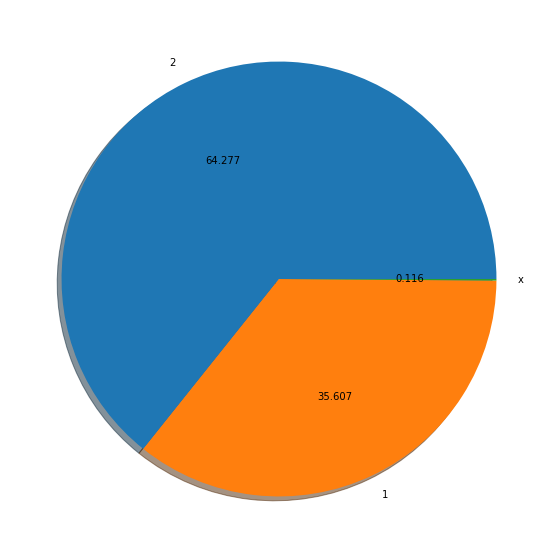

In [31]:
label_arr=['2','1','x']
draw_piechart('NumBorrowers',label_arr)

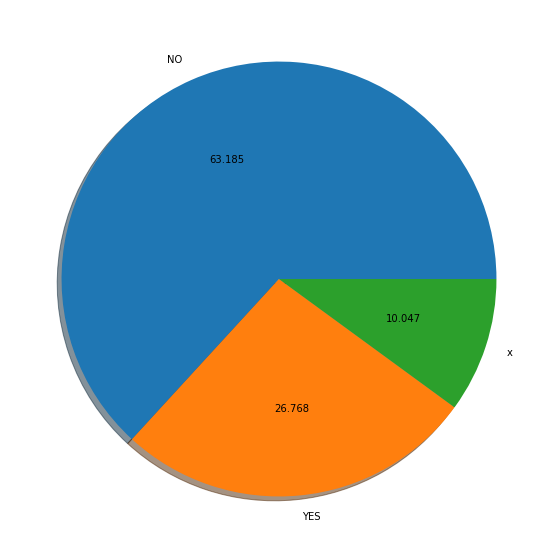

In [32]:
label_arr=['NO','YES','x']
draw_piechart('FirstTimeHomebuyer',label_arr)

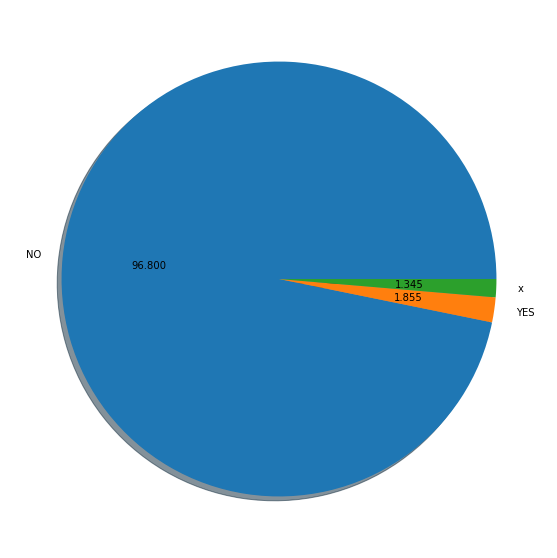

In [33]:
label_arr=['NO','YES','x']
draw_piechart('PPM',label_arr)

In [34]:
data['Occupancy'].unique()

array(['O', 'I', 'S'], dtype=object)

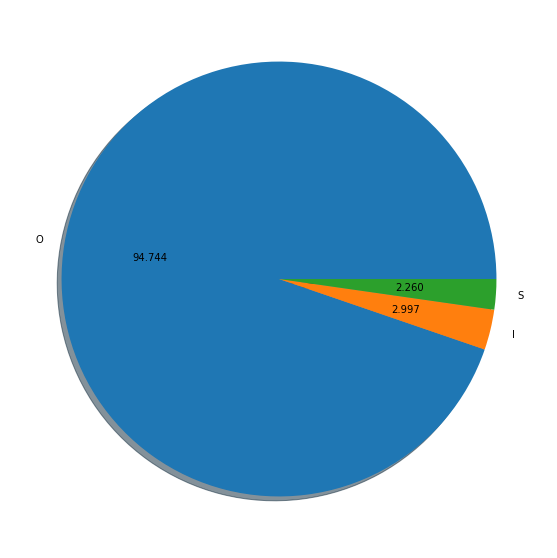

In [35]:
label_arr=['O','I','S']
draw_piechart('Occupancy',label_arr)

In [36]:
data['PostalCode'].value_counts()

94500    2582
30000    2374
48100    2166
85200    2155
48000    1976
         ... 
79500       1
26600       1
41400       1
36900       1
41300       1
Name: PostalCode, Length: 1767, dtype: int64

In [37]:
data['LoanPurpose'].unique()

array(['P', 'N', 'C'], dtype=object)

In [38]:
data['LoanPurpose'].value_counts()

P    123404
N    110036
C     58011
Name: LoanPurpose, dtype: int64

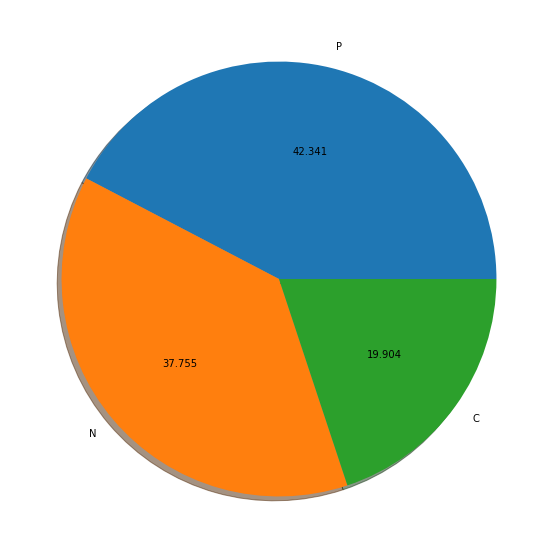

In [39]:
label_arr=['P','N','C']
draw_piechart('LoanPurpose',label_arr)

In [40]:
data['Channel'].unique()

array(['T', 'R', 'C', 'B'], dtype=object)

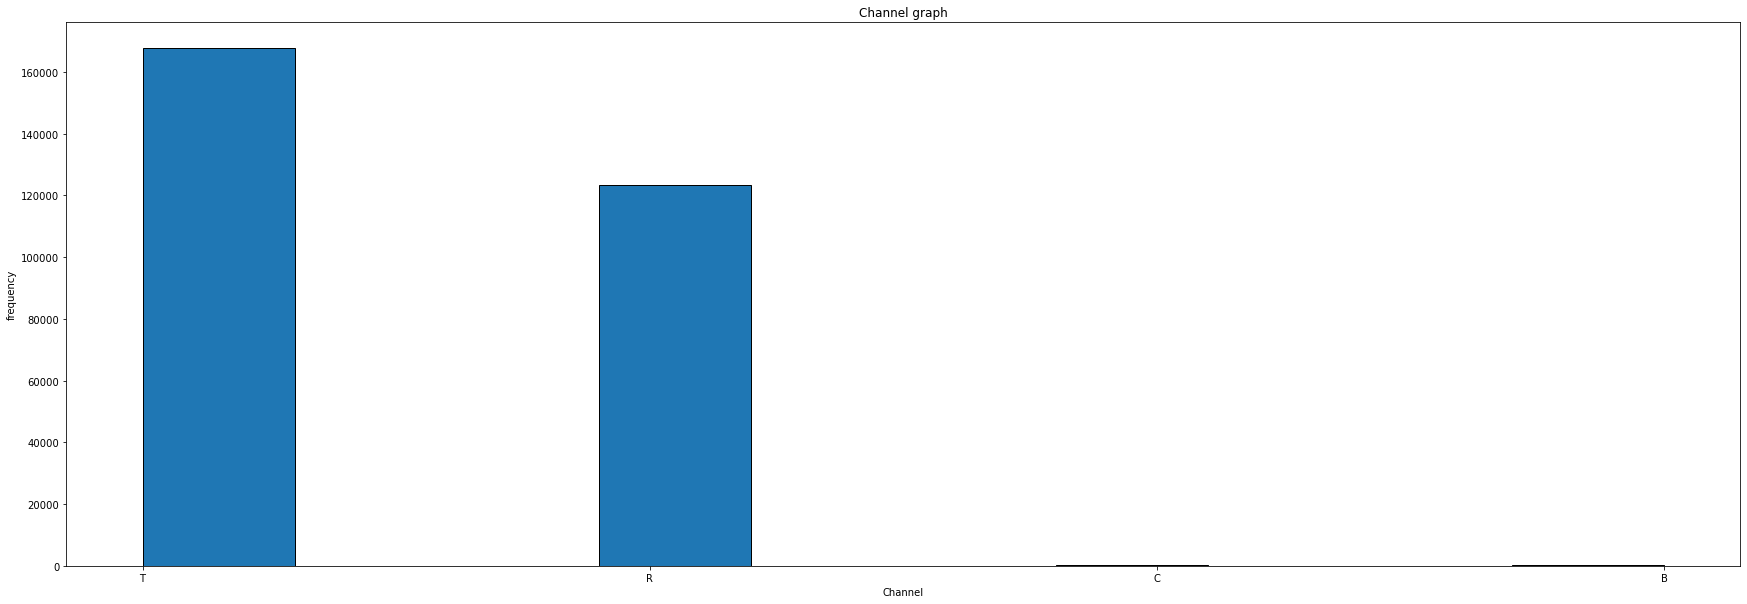

In [41]:
draw_histogram('Channel','Channel graph','Channel','frequency')

In [42]:
label_encoding('Channel')

x is unknown neither it is yes or no so we will drop x rows 

In [43]:
data['PropertyState'].unique()

array(['IL', 'CO', 'KS', 'CA', 'NJ', 'WI', 'FL', 'CT', 'GA', 'TX', 'MD',
       'MA', 'SC', 'WY', 'NC', 'AZ', 'IN', 'MS', 'NY', 'WA', 'AR', 'VA',
       'MN', 'LA', 'PA', 'OR', 'RI', 'UT', 'MI', 'TN', 'AL', 'MO', 'IA',
       'NM', 'NV', 'VT', 'OH', 'NE', 'HI', 'ID', 'PR', 'DC', 'GU', 'KY',
       'NH', 'SD', 'ME', 'MT', 'OK', 'WV', 'DE', 'ND', 'AK'], dtype=object)

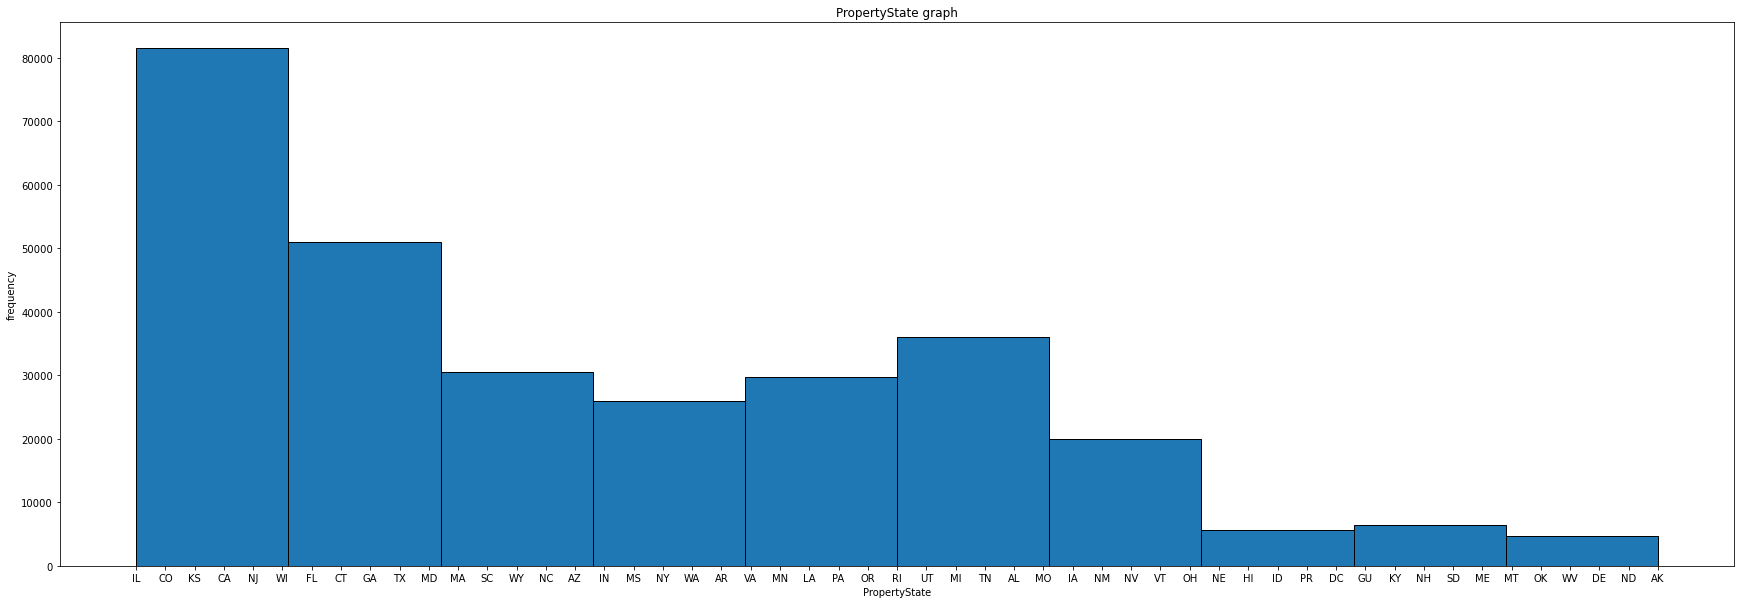

In [44]:
draw_histogram('PropertyState','PropertyState graph','PropertyState','frequency')

In [45]:
label_encoding('PropertyState')

In [46]:
data['PropertyType'].unique()

array(['SF', 'PU', 'CO', 'MH', 'CP', 'LH', 'X '], dtype=object)

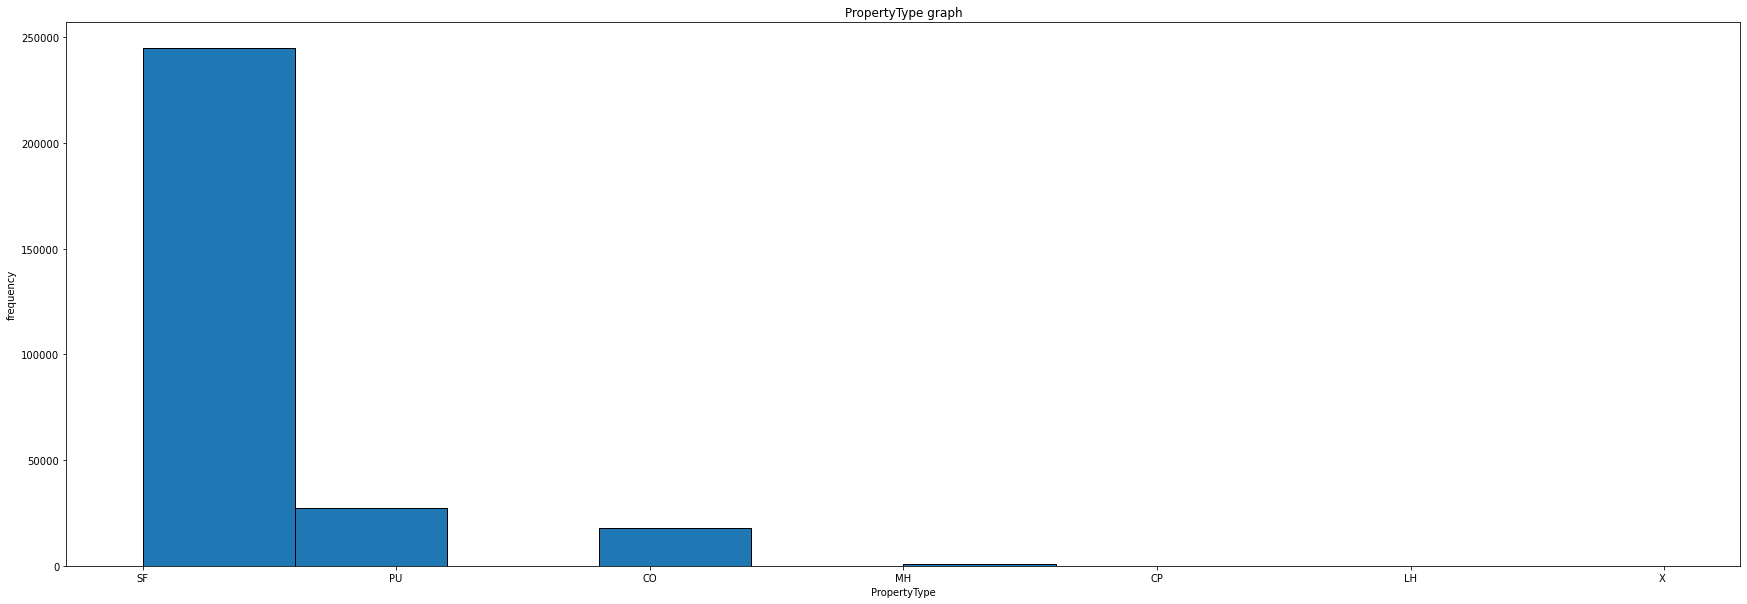

In [47]:
draw_histogram('PropertyType','PropertyType graph','PropertyType','frequency')

In [48]:
label_encoding('PropertyType')

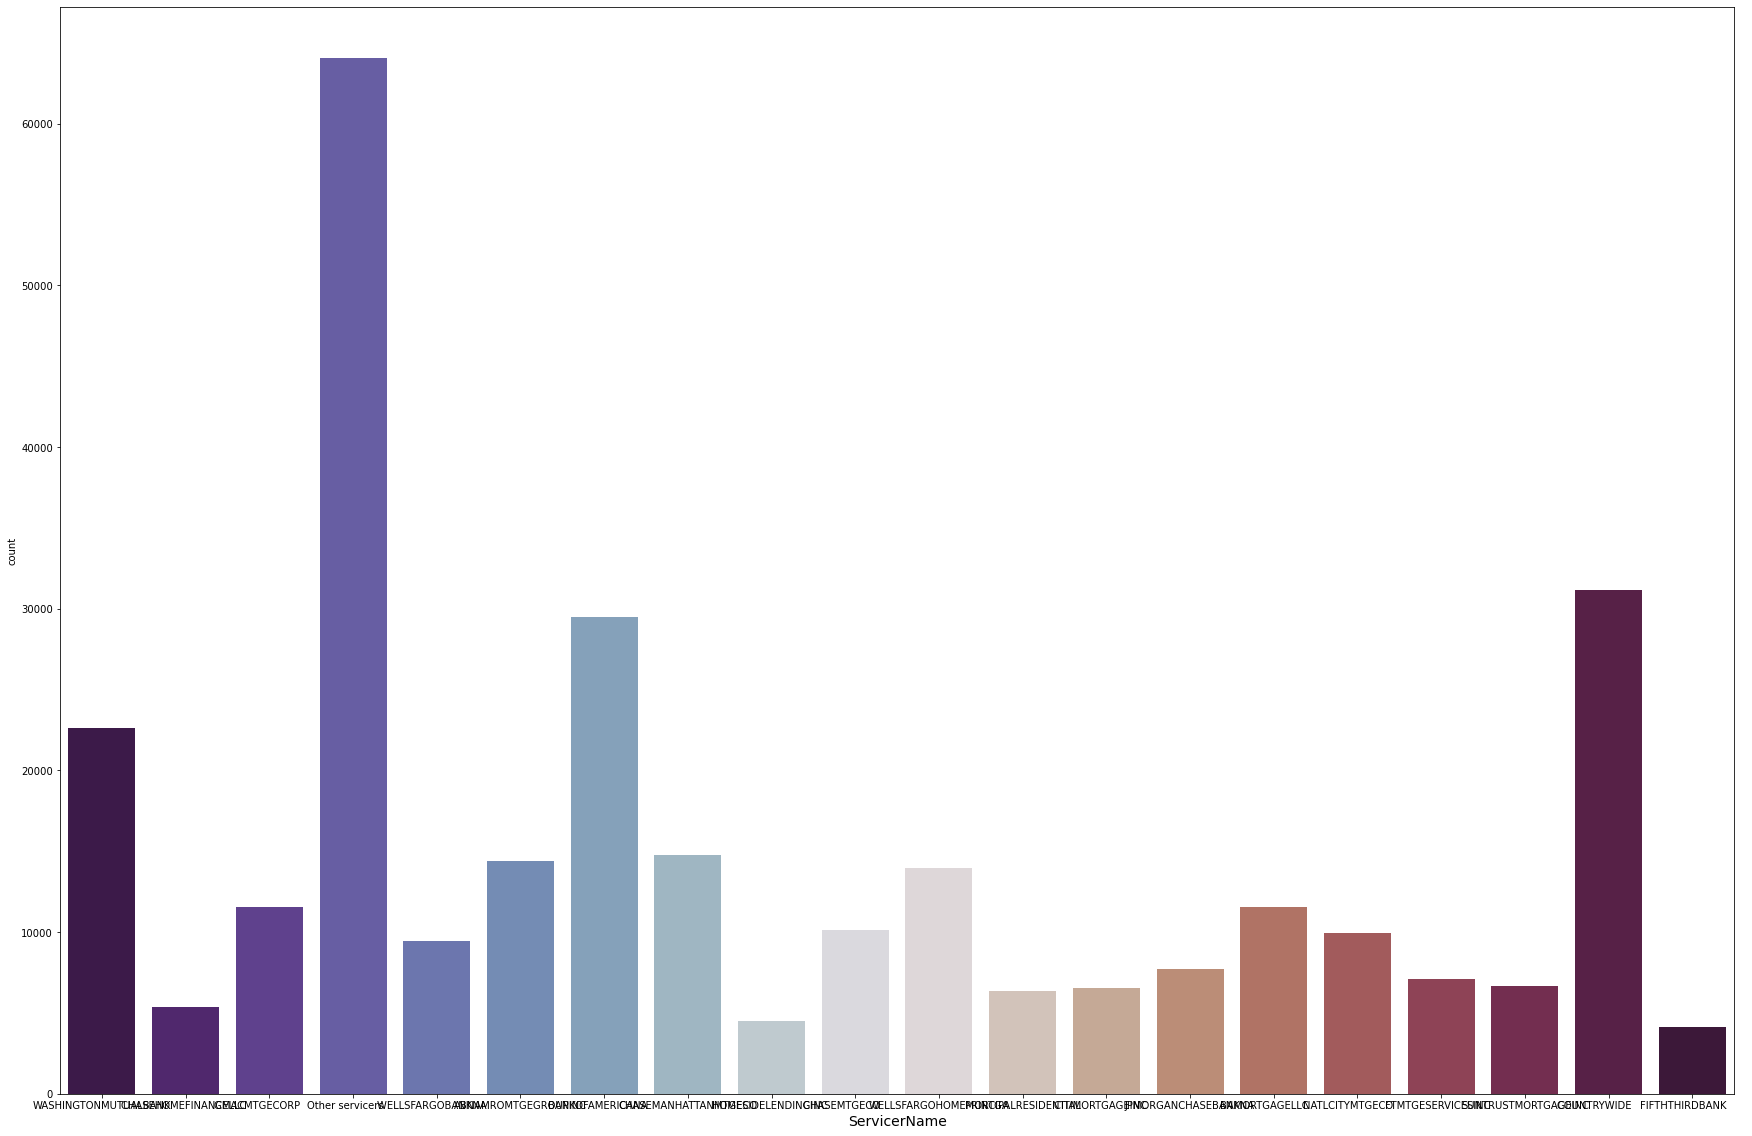

In [49]:
plt.figure(figsize=(30,20))
sns.countplot(x='ServicerName',data=data,palette="twilight_shifted")
plt.xlabel("ServicerName",fontsize=14)
plt.show()

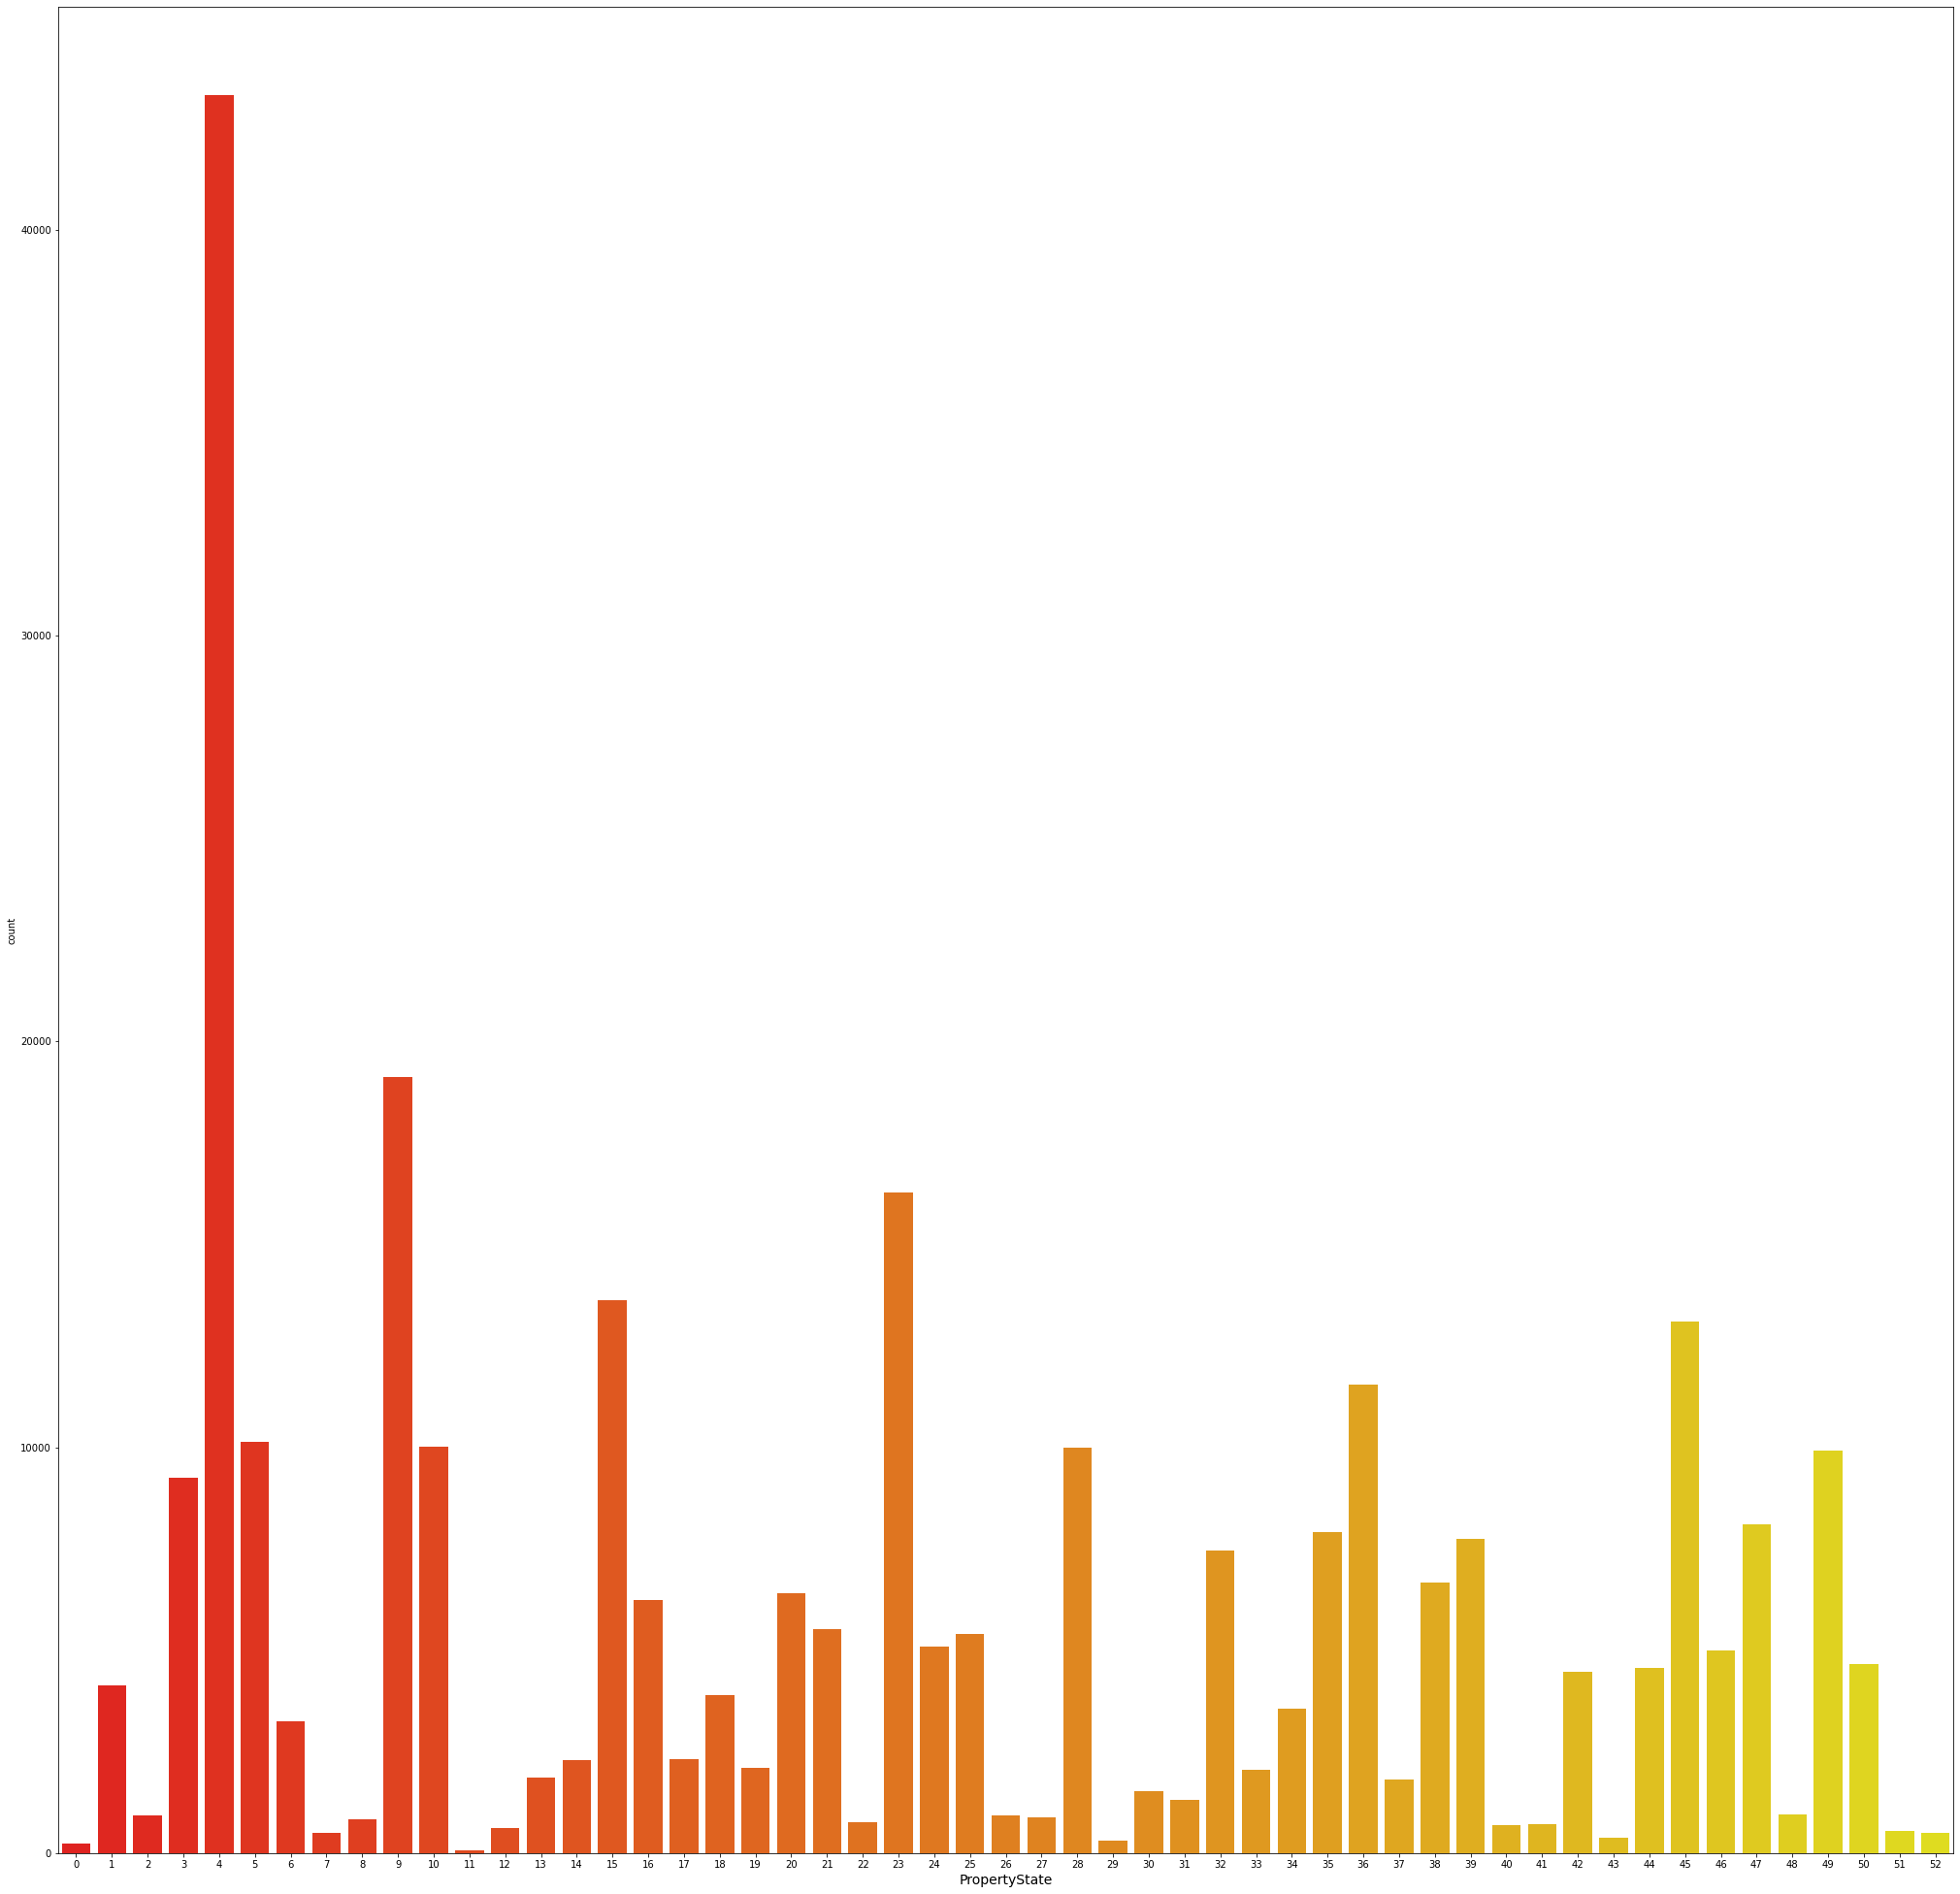

In [50]:
plt.figure(figsize=(35,35))
sns.countplot(x='PropertyState',data=data,palette="autumn")
plt.xlabel("PropertyState",fontsize=14)
plt.show()

No handles with labels found to put in legend.


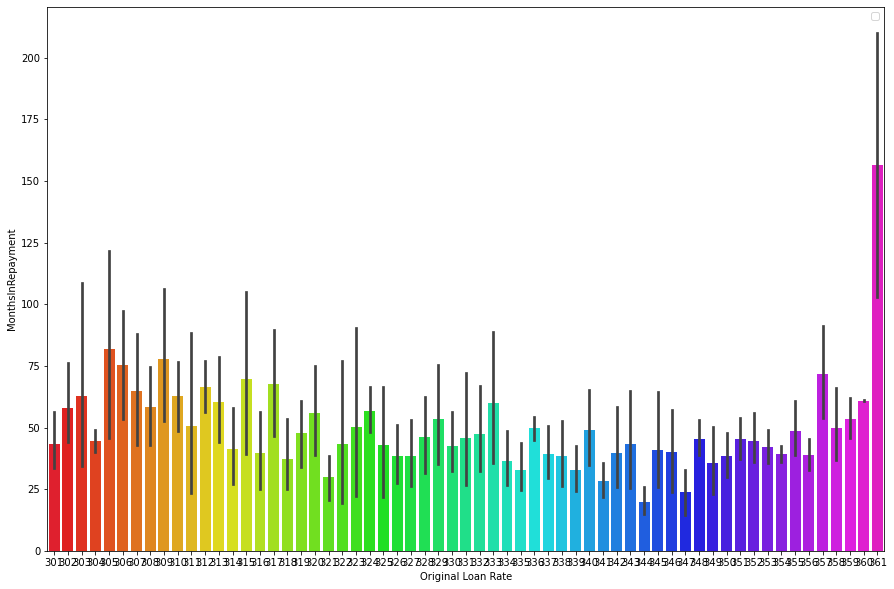

In [51]:
plt.figure(figsize=(15,10))
sns.barplot('OrigLoanTerm','MonthsInRepayment',data=data,palette='gist_rainbow')
plt.xlabel('Original Loan Rate')
plt.legend()
plt.show()

No handles with labels found to put in legend.


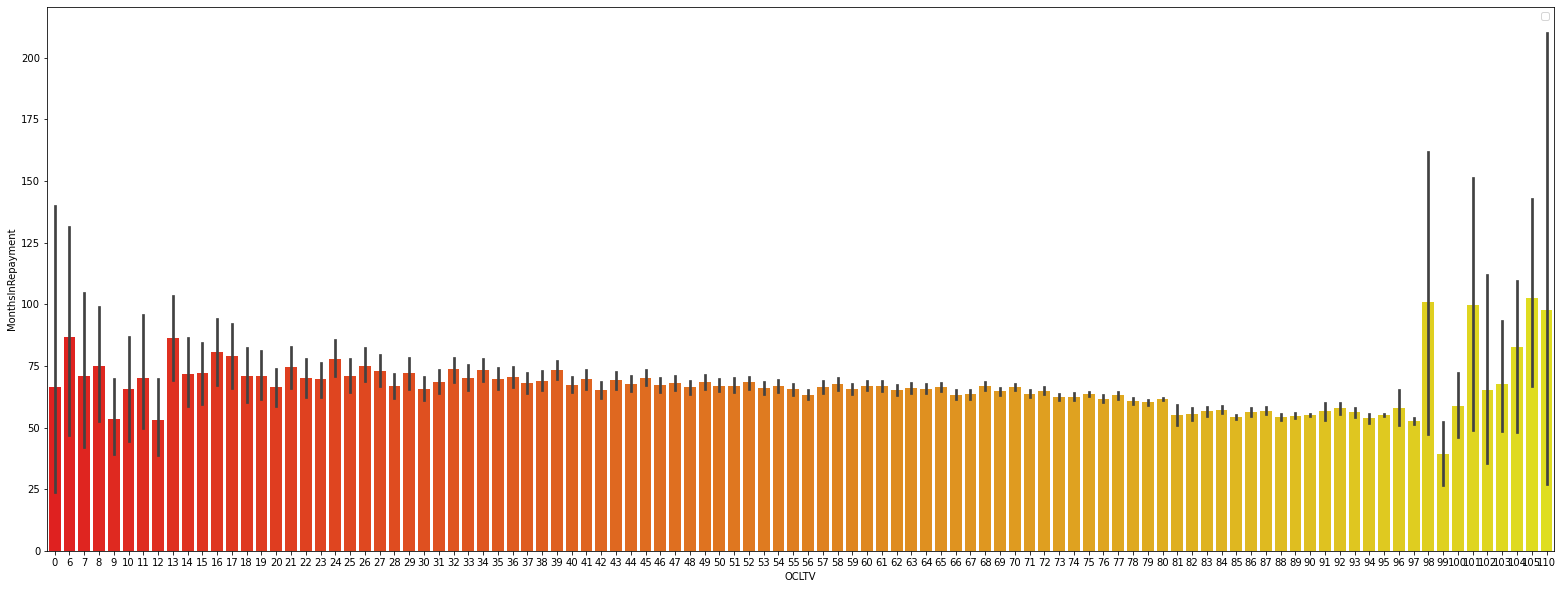

In [52]:
plt.figure(figsize=(27,10))
sns.barplot('OCLTV','MonthsInRepayment',data=data,palette='autumn')
plt.xlabel('OCLTV')
plt.legend()
plt.show()

In [53]:
data.drop(['FirstTimeHomebuyer','ServicerName','SellerName','NumBorrowers','PropertyType','PropertyState','ProductType','PPM','Channel','Occupancy','MSA','MaturityDate','FirstPaymentDate'], inplace=True,axis=1)


In [54]:
encoded_data = pd.get_dummies(data['LoanPurpose'], prefix='LoanPurpose')
data = pd.concat([data, encoded_data], axis=1)
data.drop('LoanPurpose', axis=1,inplace=True)

In [55]:
data.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,PostalCode,LoanSeqNum,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P
0,0,25,1,89,27,117000,89,6.750,60400,F199Q1268030,360,0,0,52,0,0,1
1,0,0,1,73,17,109000,73,6.500,80200,F199Q1015092,360,0,0,144,0,1,0
2,0,0,1,75,16,88000,75,6.875,66000,F199Q1266886,360,0,0,67,0,1,0
3,0,0,1,76,14,160000,76,6.875,90700,F199Q1178167,360,0,0,35,0,1,0
4,0,0,1,78,18,109000,78,7.125,7600,F199Q1178517,360,0,0,54,0,1,0


In [56]:
data.isnull().sum()

CreditScore          0
MIP                  0
Units                0
OCLTV                0
DTI                  0
OrigUPB              0
LTV                  0
OrigInterestRate     0
PostalCode           0
LoanSeqNum           0
OrigLoanTerm         0
EverDelinquent       0
MonthsDelinquent     0
MonthsInRepayment    0
LoanPurpose_C        0
LoanPurpose_N        0
LoanPurpose_P        0
dtype: int64

In [57]:
#check nulls precentage to be more sure 
data.isnull().sum()*100/data.shape[0] 

CreditScore          0.0
MIP                  0.0
Units                0.0
OCLTV                0.0
DTI                  0.0
OrigUPB              0.0
LTV                  0.0
OrigInterestRate     0.0
PostalCode           0.0
LoanSeqNum           0.0
OrigLoanTerm         0.0
EverDelinquent       0.0
MonthsDelinquent     0.0
MonthsInRepayment    0.0
LoanPurpose_C        0.0
LoanPurpose_N        0.0
LoanPurpose_P        0.0
dtype: float64

In [58]:
data.drop(['PostalCode','LoanSeqNum'], axis=1,inplace=True)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CreditScore        291451 non-null  int64  
 1   MIP                291451 non-null  int64  
 2   Units              291451 non-null  int64  
 3   OCLTV              291451 non-null  int64  
 4   DTI                291451 non-null  int64  
 5   OrigUPB            291451 non-null  int64  
 6   LTV                291451 non-null  int64  
 7   OrigInterestRate   291451 non-null  float64
 8   OrigLoanTerm       291451 non-null  int64  
 9   EverDelinquent     291451 non-null  int64  
 10  MonthsDelinquent   291451 non-null  int64  
 11  MonthsInRepayment  291451 non-null  int64  
 12  LoanPurpose_C      291451 non-null  uint8  
 13  LoanPurpose_N      291451 non-null  uint8  
 14  LoanPurpose_P      291451 non-null  uint8  
dtypes: float64(1), int64(11), uint8(3)
memory usage: 27

In [60]:
data.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0


In [61]:
data.describe()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291,0.199042,0.377545,0.423413
std,68.408791,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599,0.399280,0.484774,0.494100
min,0.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,675.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000
50%,717.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000
75%,753.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000,0.000000,1.000000,1.000000
max,849.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000,1.000000,1.000000,1.000000


In [62]:
data.corr()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P
CreditScore,1.000000,-0.164376,0.002808,-0.190848,-0.098740,0.003770,-0.191080,-0.119472,-0.008075,-0.207204,-0.150266,-0.005127,0.012689,-0.005176,-0.005175
MIP,-0.164376,1.000000,-0.042111,0.694789,0.111603,0.006729,0.695888,0.124544,0.014834,0.059993,0.051204,-0.087802,-0.326432,-0.156375,0.417212
Units,0.002808,-0.042111,1.000000,-0.046133,0.012887,0.043827,-0.046032,0.074070,0.005348,0.010163,-0.004573,0.025594,0.002475,0.020492,-0.022105
OCLTV,-0.190848,0.694789,-0.046133,1.000000,0.114853,0.106273,0.999470,0.095268,0.018560,0.065528,0.059811,-0.094299,-0.310735,-0.142061,0.390483
DTI,-0.098740,0.111603,0.012887,0.114853,1.000000,0.063640,0.114468,0.105216,0.028005,0.062109,0.040830,-0.007732,-0.003264,-0.063646,0.065082
OrigUPB,0.003770,0.006729,0.043827,0.106273,0.063640,1.000000,0.105722,-0.128563,-0.008008,-0.067605,-0.067243,-0.211698,-0.043511,0.014162,0.021267
LTV,-0.191080,0.695888,-0.046032,0.999470,0.114468,0.105722,1.000000,0.095520,0.018477,0.065735,0.059930,-0.094596,-0.310805,-0.141873,0.390355
OrigInterestRate,-0.119472,0.124544,0.074070,0.095268,0.105216,-0.128563,0.095520,1.000000,0.010794,0.060418,0.051706,-0.120378,-0.013966,-0.015458,0.026452
OrigLoanTerm,-0.008075,0.014834,0.005348,0.018560,0.028005,-0.008008,0.018477,0.010794,1.000000,0.010348,0.006567,0.016591,0.016022,-0.032148,0.018593
EverDelinquent,-0.207204,0.059993,0.010163,0.065528,0.062109,-0.067605,0.065735,0.060418,0.010348,1.000000,0.420048,0.232497,0.017766,0.004577,-0.018847


<AxesSubplot:>

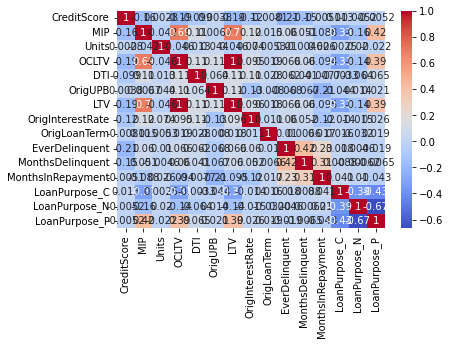

In [63]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
#show the correlation between data using heat map

<AxesSubplot:>

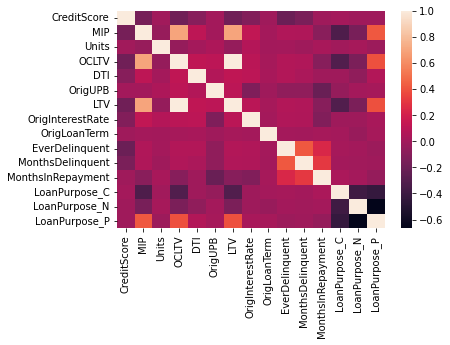

In [64]:
sns.heatmap(data.corr(),cmap='rocket')

<AxesSubplot:>

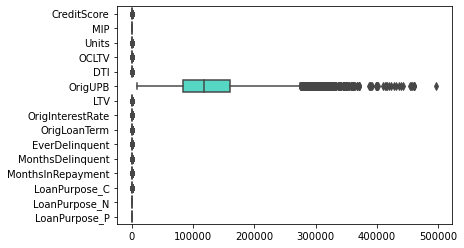

In [65]:
sns.boxplot(data=data,palette='rainbow',orient='h')
#box plot to all features to show outliers

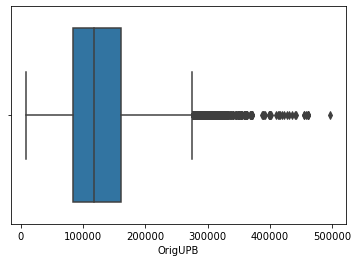

In [66]:
draw_boxplot('OrigUPB')

In [67]:
upp,low=handle_outlier(data['OrigUPB'])

In [68]:
data['OrigUPB']=np.where(data['OrigUPB']>upp,upp,data['OrigUPB'])
data['OrigUPB']=np.where(data['OrigUPB']<low,low,data['OrigUPB'])

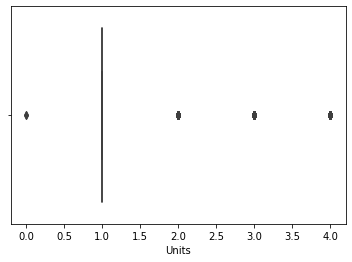

In [69]:
draw_boxplot('Units')

In [70]:
upper,lower=handle_outlier(data['Units'])

In [71]:
data['Units']=np.where(data['Units']>upper,upper,data['Units'])
data['Units']=np.where(data['Units']<lower,lower,data['Units'])

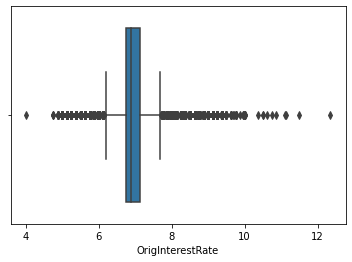

In [72]:
draw_boxplot('OrigInterestRate')

In [73]:
uppero,lowero=handle_outlier(data['OrigInterestRate'])

In [74]:
data['OrigInterestRate']=np.where(data['OrigInterestRate']>uppero,uppero,data['OrigInterestRate'])
data['OrigInterestRate']=np.where(data['OrigInterestRate']<lowero,lowero,data['OrigInterestRate'])

In [75]:
duplicate=data.duplicated()
print(duplicate.sum())

2857


In [76]:
data=data.drop_duplicates()

In [77]:
duplicate=data.duplicated()
print(duplicate.sum())

0


<AxesSubplot:>

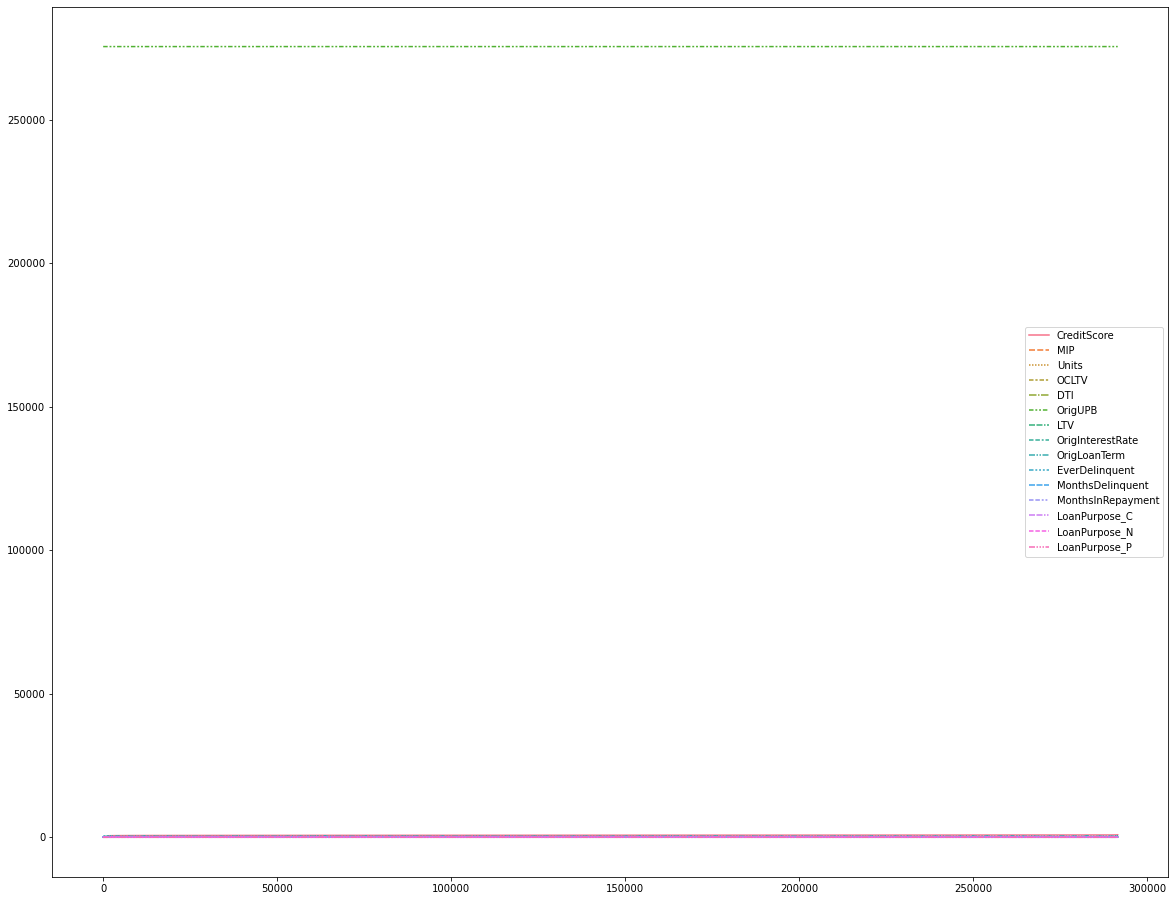

In [78]:
plt.figure(figsize=(20,16))
sns.lineplot(data=data)

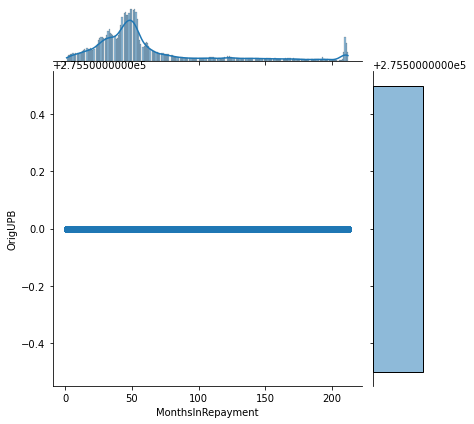

In [79]:
draw_join_plot(data['MonthsInRepayment'],data['OrigUPB'])

In [80]:
data['EverDelinquent'].unique()

array([0, 1], dtype=int64)

In [81]:
data['EverDelinquent'].value_counts()

0    230968
1     57626
Name: EverDelinquent, dtype: int64

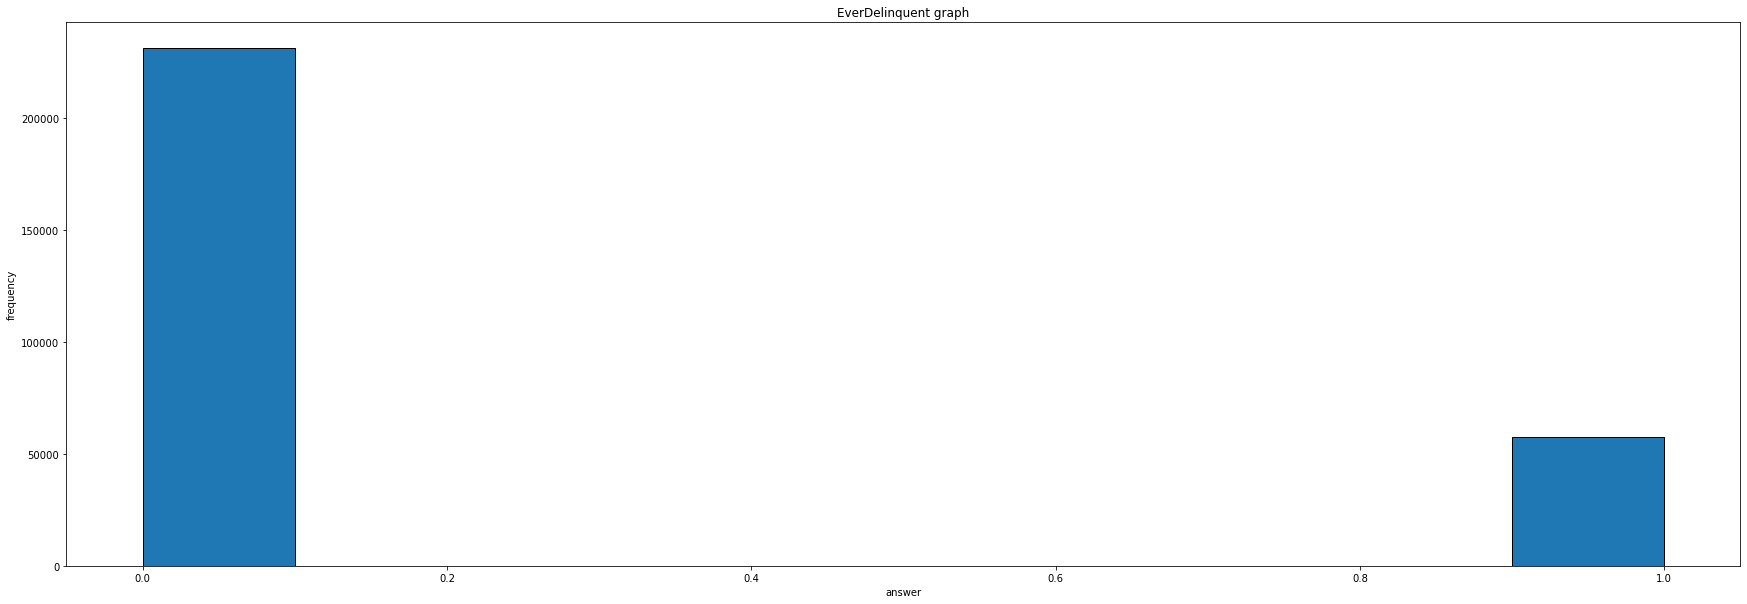

In [82]:
draw_histogram('EverDelinquent','EverDelinquent graph','answer','frequency')

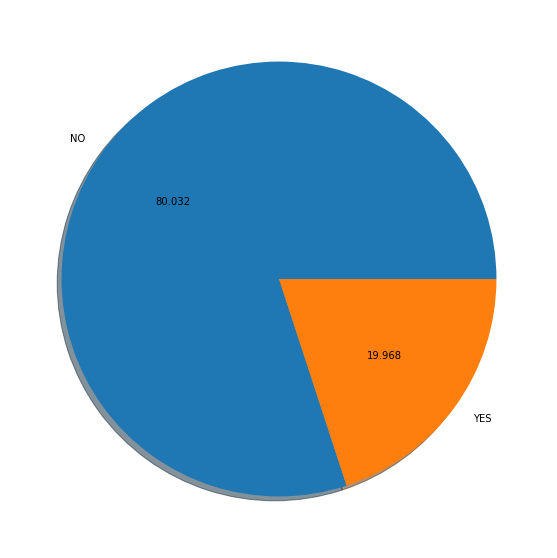

In [83]:
labels=['NO','YES']
draw_piechart('EverDelinquent',labels)

In [84]:
# sns.pairplot(data)

this make the relations between features clear

[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Frequency')]

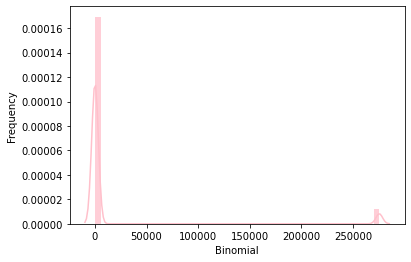

In [85]:
from scipy.stats import binom
ax=sns.distplot(data,
                kde=True,
                color='pink',
                hist_kws={"linewidth": 22,'alpha':0.77})
ax.set(xlabel='Binomial',ylabel='Frequency')

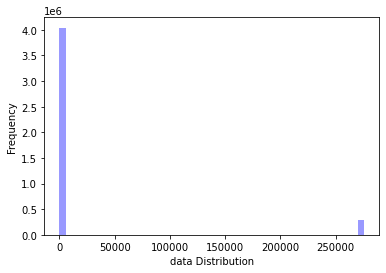

In [86]:
ax = sns.distplot(data,
                  kde=False,
                  color='blue')
ax.set(xlabel='data Distribution', ylabel='Frequency')
 
plt.show()

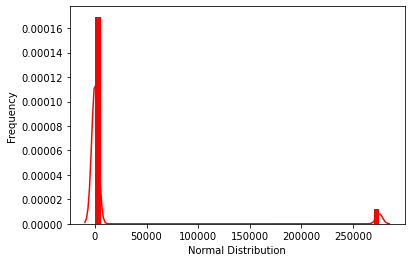

In [87]:
import scipy.stats as stats
ax = sns.distplot(data,
                  bins=50,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
 
plt.show()

In [88]:
#calculating z score to know how far from mean value (by calculating standard deviation)
#help you to know more about data
from scipy import stats
z_score=np.abs(stats.zscore(data))
print (z_score)

        CreditScore       MIP  Units     OCLTV       DTI  OrigUPB       LTV  \
0         10.365511  1.255844    NaN  0.795177  0.230923      NaN  0.797248   
1         10.365511  0.725835    NaN  0.253483  0.988134      NaN  0.252174   
2         10.365511  0.725835    NaN  0.122401  1.063855      NaN  0.120997   
3         10.365511  0.725835    NaN  0.056859  1.215297      NaN  0.055408   
4         10.365511  0.725835    NaN  0.074223  0.912413      NaN  0.075770   
...             ...       ...    ...       ...       ...      ...       ...   
291446     1.902963  0.725835    NaN  1.105519  0.147682      NaN  1.104830   
291447     1.917586  0.725835    NaN  0.253483  2.275391      NaN  0.252174   
291448     1.917586  0.725835    NaN  0.253483  0.071961      NaN  0.252174   
291449     1.990699  0.725835    NaN  0.205306  1.813545      NaN  0.206948   
291450     2.049190  0.725835    NaN  1.957556  0.079481      NaN  1.957486   

        OrigInterestRate  OrigLoanTerm  EverDelinqu

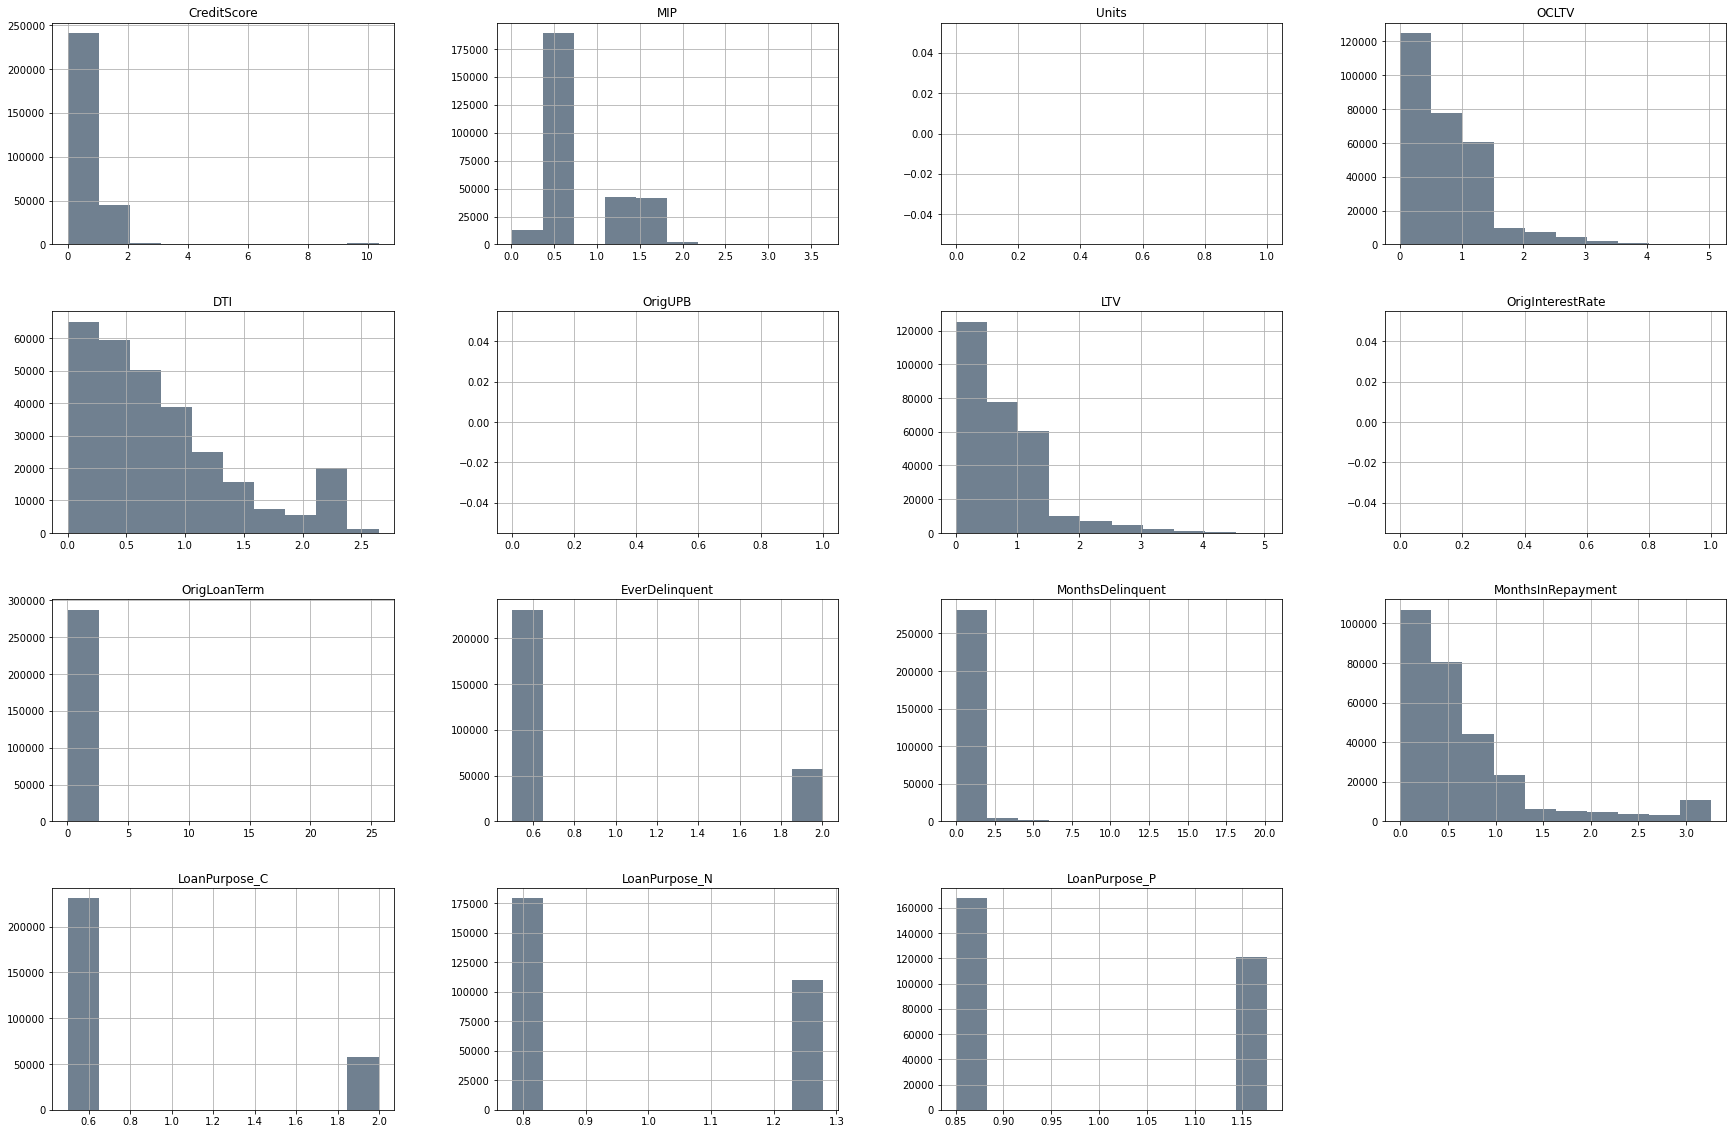

In [89]:
z_score.hist(color='slategray',figsize=(30,20))
plt.title("Standard Normal Distribution", y=1.015, fontsize=22)
plt.xlabel("z-score", labelpad=14)
plt.ylabel("frequency", labelpad=14);


that make a distribution of the data become clear

3- Feature Engineering :


In [92]:
data.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P
0,0,25,1.0,89,27,275500.0,89,7.6875,360,0,0,52,0,0,1
1,0,0,1.0,73,17,275500.0,73,7.6875,360,0,0,144,0,1,0
2,0,0,1.0,75,16,275500.0,75,7.6875,360,0,0,67,0,1,0
3,0,0,1.0,76,14,275500.0,76,7.6875,360,0,0,35,0,1,0
4,0,0,1.0,78,18,275500.0,78,7.6875,360,0,0,54,0,1,0


In [93]:
import pandas as pd

def calculate_credit_range(row):
    if row['CreditScore'] >= 750:
        return 'excellent'
    elif row['CreditScore'] >= 700:
        return 'good'
    elif row['CreditScore'] >= 650:
        return 'fair'
    else:
        return 'poor'
    
def calculate_ltv_range(row):
    if row['LTV'] < 75:
        return 'low'
    elif row['LTV'] >= 75 and row['LTV'] < 80:
        return 'medium'
    elif row['LTV'] >= 80 and row['LTV'] < 90:
        return 'high'
    else:
        return 'very high'
    
def calculate_repay_range(row):
    if row['OrigInterestRate'] < 4:
        return 'low'
    elif row['OrigInterestRate'] >= 4 and row['OrigInterestRate'] < 6:
        return 'medium'
    else:
        return 'high'

def calculate_is_first_time(row):
    if row['EverDelinquent'] == 0:
        return 1
    else:
        return 0

data['CreditRange'] = data.apply(calculate_credit_range, axis=1)
data['LTVRange'] = data.apply(calculate_ltv_range, axis=1)
data['RepayRange'] = data.apply(calculate_repay_range, axis=1)
data['IsFirstTime'] = data.apply(calculate_is_first_time, axis=1)

# convert categorical ranges to numerical features
credit_range_dummies = pd.get_dummies(data['CreditRange'], prefix='CreditRange')
ltv_range_dummies = pd.get_dummies(data['LTVRange'], prefix='LTVRange')
repay_range_dummies = pd.get_dummies(data['RepayRange'], prefix='RepayRange')

# concatenate the newly created numerical features to the original data
raw_data = pd.concat([data, credit_range_dummies, ltv_range_dummies, repay_range_dummies], axis=1)

# drop the original categorical ranges
raw_data = raw_data.drop(['CreditRange', 'LTVRange', 'RepayRange'], axis=1)


In [94]:
raw_data.isnull().sum()

CreditScore              0
MIP                      0
Units                    0
OCLTV                    0
DTI                      0
OrigUPB                  0
LTV                      0
OrigInterestRate         0
OrigLoanTerm             0
EverDelinquent           0
MonthsDelinquent         0
MonthsInRepayment        0
LoanPurpose_C            0
LoanPurpose_N            0
LoanPurpose_P            0
IsFirstTime              0
CreditRange_excellent    0
CreditRange_fair         0
CreditRange_good         0
CreditRange_poor         0
LTVRange_high            0
LTVRange_low             0
LTVRange_medium          0
LTVRange_very high       0
RepayRange_high          0
dtype: int64

In [95]:
data.drop(["MonthsInRepayment",'MonthsDelinquent'],axis=1,inplace=True)
raw_data.drop(["MonthsInRepayment",'MonthsDelinquent'],axis=1,inplace=True)
#because they are strongly corrolated with the target and cause data leakage (over fitting)

In [96]:
x=raw_data.drop(['EverDelinquent'], axis=1)
y=raw_data['EverDelinquent']

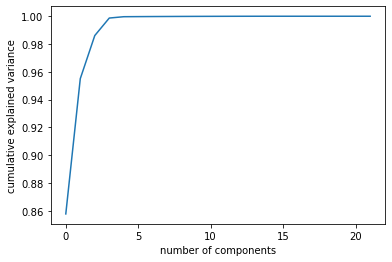

In [97]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stat_data = scaler.fit_transform(x)


In [99]:
x.isnull().sum()

CreditScore              0
MIP                      0
Units                    0
OCLTV                    0
DTI                      0
OrigUPB                  0
LTV                      0
OrigInterestRate         0
OrigLoanTerm             0
LoanPurpose_C            0
LoanPurpose_N            0
LoanPurpose_P            0
IsFirstTime              0
CreditRange_excellent    0
CreditRange_fair         0
CreditRange_good         0
CreditRange_poor         0
LTVRange_high            0
LTVRange_low             0
LTVRange_medium          0
LTVRange_very high       0
RepayRange_high          0
dtype: int64

In [100]:
!pip install category_encoders
#to install the needed liberary 

In [101]:
x.corr()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,LoanPurpose_C,...,IsFirstTime,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,LTVRange_high,LTVRange_low,LTVRange_medium,LTVRange_very high,RepayRange_high
CreditScore,1.000000,-0.164452,NaN,-0.192064,-0.097988,NaN,-0.192301,NaN,-0.008232,0.013055,...,0.207981,0.553545,-0.277721,0.173103,-0.605819,-0.030740,0.161907,-0.015772,-0.128342,NaN
MIP,-0.164452,1.000000,NaN,0.693683,0.110037,NaN,0.694790,NaN,0.014583,-0.326172,...,-0.062740,-0.178204,0.103199,-0.008118,0.111687,-0.102612,-0.495156,-0.280850,0.854941,NaN
Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OCLTV,-0.192064,0.693683,NaN,1.000000,0.114974,NaN,0.999467,NaN,0.018183,-0.309320,...,-0.068768,-0.232229,0.128910,0.017554,0.113741,0.213058,-0.787511,-0.008553,0.626694,NaN
DTI,-0.097988,0.110037,NaN,0.114974,1.000000,NaN,0.114589,NaN,0.028282,-0.003587,...,-0.061816,-0.143546,0.092761,0.014413,0.048756,0.019407,-0.095719,-0.015805,0.094529,NaN
OrigUPB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LTV,-0.192301,0.694790,NaN,0.999467,0.114589,NaN,1.000000,NaN,0.018099,-0.309387,...,-0.068986,-0.232299,0.129046,0.017294,0.114018,0.211962,-0.787436,-0.008433,0.627642,NaN
OrigInterestRate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OrigLoanTerm,-0.008232,0.014583,NaN,0.018183,0.028282,NaN,0.018099,NaN,1.000000,0.016291,...,-0.010681,-0.017634,0.007305,0.008498,0.001888,0.008773,-0.020532,-0.010980,0.021566,NaN
LoanPurpose_C,0.013055,-0.326172,NaN,-0.309320,-0.003587,NaN,-0.309387,NaN,0.016291,1.000000,...,-0.016158,-0.009217,0.012598,0.008056,-0.015170,-0.072910,0.245795,0.134365,-0.293414,NaN


In [102]:
x.isnull().sum()

CreditScore              0
MIP                      0
Units                    0
OCLTV                    0
DTI                      0
OrigUPB                  0
LTV                      0
OrigInterestRate         0
OrigLoanTerm             0
LoanPurpose_C            0
LoanPurpose_N            0
LoanPurpose_P            0
IsFirstTime              0
CreditRange_excellent    0
CreditRange_fair         0
CreditRange_good         0
CreditRange_poor         0
LTVRange_high            0
LTVRange_low             0
LTVRange_medium          0
LTVRange_very high       0
RepayRange_high          0
dtype: int64

In [103]:
import category_encoders as ce
from sklearn.feature_selection import SelectKBest , SelectPercentile , mutual_info_classif

In [104]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(x,y)
print(mi_score)

[0.03519106 0.00605162 0.04850499 0.00593623 0.00340326 0.06209589
 0.00717572 0.03264458 0.05216415 0.00460823 0.01825293 0.02428778
 0.56183564 0.02678578 0.01141418 0.01933052 0.01990645 0.00873002
 0.01616522 0.00113744 0.00851395 0.04883389]


In [105]:
from sklearn.feature_selection import chi2
best_features=SelectKBest(score_func=chi2,k=10)
fit=best_features.fit(x,y)
df_scores= pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(x.columns)
features_score =pd.concat([df_col,df_scores], axis=1)
features_score.columns=['feature','score']
features_score.sort_values(by=['score'],ascending=False)

,feature,score
0,CreditScore,82359.595413
12,IsFirstTime,57626.000000
1,MIP,19744.704343
16,CreditRange_poor,10687.847857
4,DTI,6400.546513
13,CreditRange_excellent,5657.824604
6,LTV,4154.641315
3,OCLTV,4133.179912
14,CreditRange_fair,2040.557971
15,CreditRange_good,1376.444581


In [106]:
selector=SelectKBest(mutual_info_classif,k=15)
x_selected=selector.fit_transform(x,y)
cols=selector.get_support(indices=True)
selected_features = x.iloc[:,cols].columns.tolist()
selected_features

['CreditScore',
 'Units',
 'OrigUPB',
 'OrigInterestRate',
 'OrigLoanTerm',
 'LoanPurpose_N',
 'LoanPurpose_P',
 'IsFirstTime',
 'CreditRange_excellent',
 'CreditRange_fair',
 'CreditRange_good',
 'CreditRange_poor',
 'LTVRange_high',
 'LTVRange_low',
 'RepayRange_high']

In [107]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[4.37410326e-03 5.51206888e-04 0.00000000e+00 4.22915692e-04
 9.79317048e-04 0.00000000e+00 4.67898040e-04 0.00000000e+00
 1.11702528e-04 1.66841310e-04 7.97319189e-05 1.59074268e-04
 9.62178077e-01 9.13346489e-03 3.33391258e-03 3.31368945e-03
 1.39813994e-02 3.76717518e-05 4.23178306e-04 5.11954518e-05
 2.34620249e-04 0.00000000e+00]


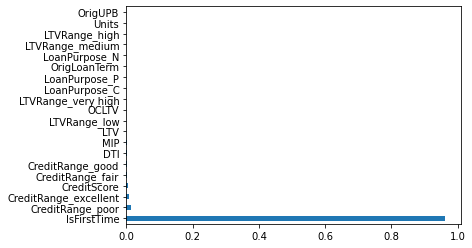

In [108]:
feat_imp=pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()

In [112]:
raw_data.columns

Index(['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent', 'LoanPurpose_C',
       'LoanPurpose_N', 'LoanPurpose_P', 'IsFirstTime',
       'CreditRange_excellent', 'CreditRange_fair', 'CreditRange_good',
       'CreditRange_poor', 'LTVRange_high', 'LTVRange_low', 'LTVRange_medium',
       'LTVRange_very high', 'RepayRange_high'],
      dtype='object')

In [113]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


# Define the number of top features to select
N = 6

# Select top N features based on mutual information
selector = SelectKBest(score_func=mutual_info_regression, k=N)
X_selected = selector.fit_transform(x, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = x.columns[selected_feature_indices].tolist()



In [114]:
df_selected = pd.DataFrame(X_selected)

df_selected.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
dtype: object

In [115]:
from sklearn.model_selection import train_test_split


# separate features and labels
import pandas as pd
df_selected = pd.DataFrame(X_selected)
features = df_selected

df_labels = pd.DataFrame(y)
labels = df_labels["EverDelinquent"]


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) 


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))


X_train shape: (173156, 6)
X_test shape: (57719, 6)
y_train shape: (173156,)
y_test shape: (57719,)
X_val shape: (173156,)
y val shape: (57719,)


In [116]:
features.shape

(288594, 6)

In [117]:
labels.shape

(288594,)

In [118]:
labels.value_counts()

0    230968
1     57626
Name: EverDelinquent, dtype: int64

In [120]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(features,labels)


In [121]:
y_resampled.value_counts()

0    230968
1    230968
Name: EverDelinquent, dtype: int64

# Random Forest Model 

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Train the random forest classifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [124]:
#Testing Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_test = rf.predict(X_test)
y_pred_test[0:5]


testing_accuracy = accuracy_score(y_test,y_pred_test)*100
print('Testing data accuracy is:', testing_accuracy)
print()

clf_report = classification_report(y_test,y_pred_test)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_test,y_pred_test)

Testing data accuracy is: 100.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46229
           1       1.00      1.00      1.00     11490

    accuracy                           1.00     57719
   macro avg       1.00      1.00      1.00     57719
weighted avg       1.00      1.00      1.00     57719




array([[46229,     0],
       [    0, 11490]], dtype=int64)

In [125]:
#Training Accuracy

y_pred_train = rf.predict(X_train)
y_pred_train


training_accuracy = accuracy_score(y_train,y_pred_train)*100
print('training data accuracy is:', training_accuracy)
print()

clf_report = classification_report(y_train,y_pred_train)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_train,y_pred_train)

training data accuracy is: 100.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    138561
           1       1.00      1.00      1.00     34595

    accuracy                           1.00    173156
   macro avg       1.00      1.00      1.00    173156
weighted avg       1.00      1.00      1.00    173156




array([[138561,      0],
       [     0,  34595]], dtype=int64)

In [126]:
accuracy_score(y_test,y_pred)

1.0

# SVC Model (Support Vector Machine)

In [127]:
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [128]:
model=LinearSVC()
model.fit(X_resampled,y_resampled)
train_pred=model.predict(X_train)
y_preds=model.predict(X_test)

print(f"Training score = {metrics.accuracy_score(y_train,train_pred)}")
print(f"Testing score = {metrics.accuracy_score(y_test,y_preds)}")


Training score = 0.19979093996165306
Testing score = 0.19906789791922938


In [129]:
confusion_matrix(y_test,y_preds)

array([[    0, 46229],
       [    0, 11490]], dtype=int64)

In [130]:
accuracy_score(y_test,y_preds)

0.19906789791922938

# Decision Tree

In [131]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [134]:
dt_model = DecisionTreeClassifier(criterion='gini')

In [135]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [136]:
y_pred_test = dt_model.predict(X_test)
y_pred_test[0:5]


testing_accuracy = accuracy_score(y_test,y_pred_test)
print('Testing data accuracy is:', testing_accuracy)
print()

clf_report = classification_report(y_test,y_pred_test)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_test,y_pred_test)

Testing data accuracy is: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46229
           1       1.00      1.00      1.00     11490

    accuracy                           1.00     57719
   macro avg       1.00      1.00      1.00     57719
weighted avg       1.00      1.00      1.00     57719




array([[46229,     0],
       [    0, 11490]], dtype=int64)

In [137]:
y_pred_train = dt_model.predict(X_train)
y_pred_train


training_accuracy = accuracy_score(y_train,y_pred_train)
print('training data accuracy is:', training_accuracy)
print()

clf_report = classification_report(y_train,y_pred_train)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_train,y_pred_train)

training data accuracy is: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    138561
           1       1.00      1.00      1.00     34595

    accuracy                           1.00    173156
   macro avg       1.00      1.00      1.00    173156
weighted avg       1.00      1.00      1.00    173156




array([[138561,      0],
       [     0,  34595]], dtype=int64)

# Hpyerparameter Tunning

# 1.GridSearchCV

In [138]:
hyperparameters = {'criterion' :['gini','entropy'],
                  'max_depth' : np.arange(2,10),
                  'min_samples_split' : np.arange(2,21),
                  'min_samples_leaf' : np.arange(1,15)}

dt_model = DecisionTreeClassifier()
gscv_dt_model = GridSearchCV(dt_model, hyperparameters, cv = 5)
gscv_dt_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])})

In [139]:
gscv_dt_model.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [141]:
best_model = DecisionTreeClassifier(max_depth = 2,
                                    min_samples_leaf= 1,
                                    min_samples_split= 2)
best_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [142]:
y_pred_test = best_model.predict(X_test)
y_pred_test[0:5]


testing_accuracy = accuracy_score(y_test,y_pred_test)
print('Testing data accuracy is:', testing_accuracy)
print()

clf_report = classification_report(y_test,y_pred_test)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_test,y_pred_test)

Testing data accuracy is: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46229
           1       1.00      1.00      1.00     11490

    accuracy                           1.00     57719
   macro avg       1.00      1.00      1.00     57719
weighted avg       1.00      1.00      1.00     57719




array([[46229,     0],
       [    0, 11490]], dtype=int64)

In [143]:
y_pred_train = best_model.predict(X_train)
y_pred_train


training_accuracy = accuracy_score(y_train,y_pred_train)
print('training data accuracy is:', training_accuracy)
print()

clf_report = classification_report(y_train,y_pred_train)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_train,y_pred_train)

training data accuracy is: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    138561
           1       1.00      1.00      1.00     34595

    accuracy                           1.00    173156
   macro avg       1.00      1.00      1.00    173156
weighted avg       1.00      1.00      1.00    173156




array([[138561,      0],
       [     0,  34595]], dtype=int64)

In [144]:
best_model

DecisionTreeClassifier(max_depth=2)

In [146]:
plt.figure(figsize = (200,100))
tree = plot_tree(decision_tree = best_model, feature_names = data.columns, class_names = ['0','1'],
                filled = True)

plt.savefig('DT_RSCV_Hyperparameters.png')

In [147]:
dt_model = DecisionTreeClassifier(ccp_alpha = 0.004274040615823919)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.004274040615823919)

# Pruning

In [148]:
values = dt_model.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = values['ccp_alphas']
ccp_alphas

array([0.        , 0.31974904])

In [149]:
train_accuracy = []
test_accuracy = []

for ccp_alpha in ccp_alphas:
#     print(ccp_alpha)
    dt_model = DecisionTreeClassifier(ccp_alpha = ccp_alpha, random_state = 1)
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train,y_train))
    test_accuracy.append(dt_model.score(X_test,y_test))

In [150]:
max(test_accuracy)

1.0

In [151]:
max(train_accuracy)

1.0

In [152]:
train_accuracy.index(max(train_accuracy))

0

In [153]:
test_accuracy.index(max(test_accuracy))

0

In [154]:
y_pred_test = dt_model.predict(X_test)
y_pred_test[0:5]

testing_accuracy = accuracy_score(y_test,y_pred_test)
print('Testing data accuracy is:', testing_accuracy)
print()

clf_report = classification_report(y_test,y_pred_test)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_test,y_pred_test)

Testing data accuracy is: 0.8009321020807706

Classification report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     46229
           1       0.00      0.00      0.00     11490

    accuracy                           0.80     57719
   macro avg       0.40      0.50      0.44     57719
weighted avg       0.64      0.80      0.71     57719




array([[46229,     0],
       [11490,     0]], dtype=int64)

In [155]:
y_pred_train = dt_model.predict(X_train)
y_pred_train


training_accuracy = accuracy_score(y_train,y_pred_train)
print('training data accuracy is:', training_accuracy)
print()

clf_report = classification_report(y_train,y_pred_train)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_train,y_pred_train)

training data accuracy is: 0.8002090600383469

Classification report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89    138561
           1       0.00      0.00      0.00     34595

    accuracy                           0.80    173156
   macro avg       0.40      0.50      0.44    173156
weighted avg       0.64      0.80      0.71    173156




array([[138561,      0],
       [ 34595,      0]], dtype=int64)

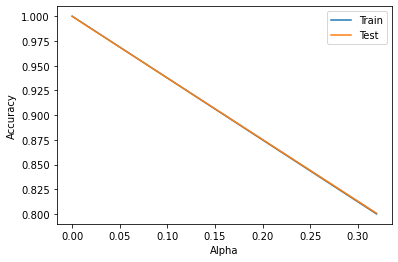

In [156]:
fig,ax = plt.subplots()

ax.plot(ccp_alphas,train_accuracy, label = 'Train' )
ax.plot(ccp_alphas,test_accuracy, label = 'Test' )
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.legend()